### Project --User Return Prediction
I solved a problem for startup compony website. it will help alot to find out the user behavior. then compony esay to make the dicision . how to sale our product using user behaavior. and what kind of user visit in our website.

In [2]:
import numpy as  np 
import pandas as pd 
import matplotlib.pyplot as plt 
 

In [3]:
df = pd.read_csv("rawdata.csv")
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [4]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


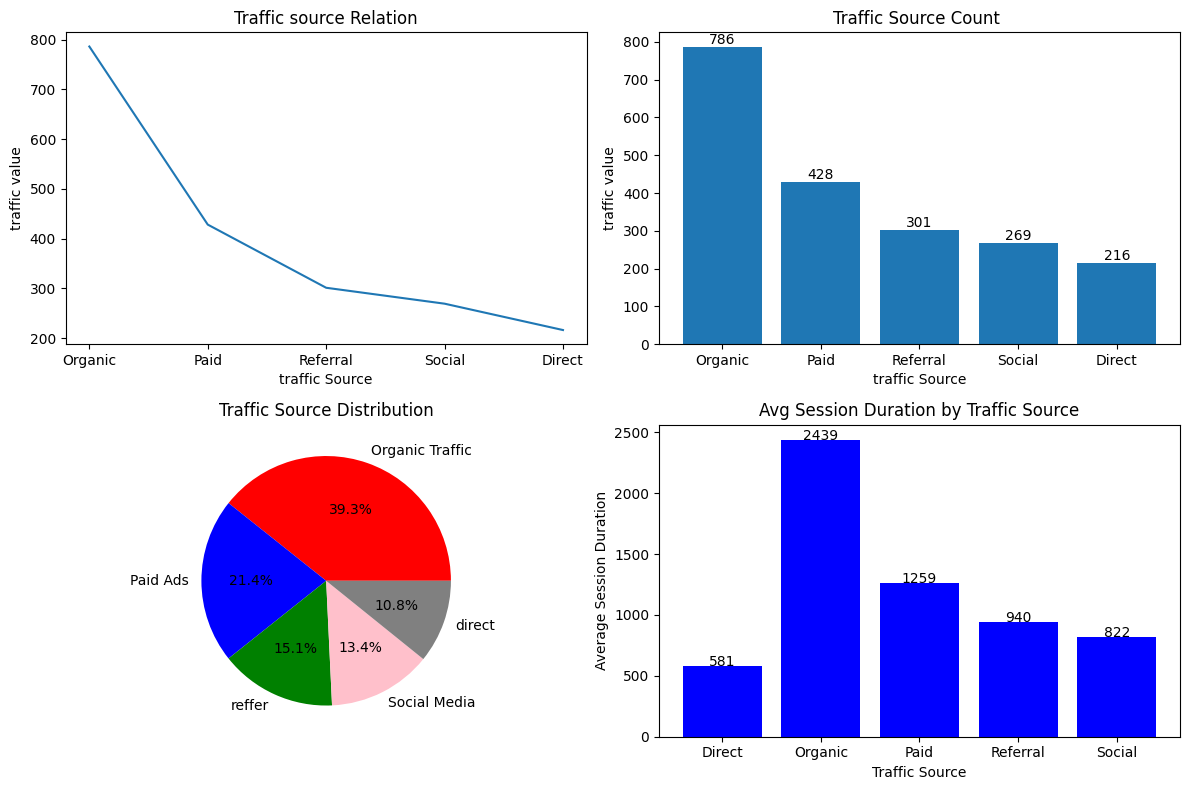

In [5]:
counts = df['Traffic Source'].value_counts()
visits = df.groupby('Traffic Source')['Session Duration'].sum()

plt.figure(figsize=(12,8)) 
plt.subplot(2,2,1)
plt.plot(counts.index, counts.values)  # line lpot 
plt.xlabel("traffic Source")
plt.ylabel("traffic value")
plt.title("Traffic source Relation")


plt.subplot(2,2,2)
plt.bar(counts.index,counts.values)   # bar plot 
plt.xlabel("traffic Source")
plt.ylabel("traffic value")
plt.title("Traffic Source Count ")

for i in range(len(counts)):
    plt.text(
        counts.index[i],
        counts.values[i],
        counts.values[i],
        ha='center',
        va='bottom'
    )
    
plt.subplot(2,2,3)
label_map ={
   'Organic': 'Organic Traffic',
    'Social': 'Social Media',
    'Paid': 'Paid Ads',
    'Referral': 'reffer',
    'Direct': 'direct'
}
labels = [label_map[i] for i in counts.index]
plt.pie(counts.values,labels=labels, autopct = '%1.1f%%', colors=["red", "blue", "green", "pink","grey"]) # pie plot 
plt.title('Traffic Source Distribution')

plt.subplot(2,2,4)
plt.bar(visits.index, visits.values , color="blue")      #bar plot 
plt.xlabel("Traffic Source")
plt.ylabel("Average Session Duration")
plt.title("Avg Session Duration by Traffic Source")

for i in range(len(counts)):
    plt.text(
        visits.index[i],      # x position
        visits.values[i],     # y position
       int(visits.values[i]),     # label value flote to integer
        ha='center',
    ) 

plt.tight_layout()


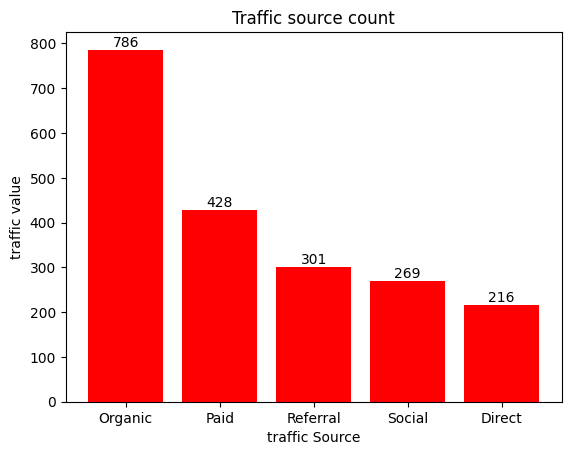

In [6]:
#bar chart for Traffic Source , count tolal value than distribute each category 

counts = df["Traffic Source"].value_counts()

plt.bar( counts.index, counts.values,color="red")

plt.xlabel("traffic Source")
plt.ylabel("traffic value")
plt.title("Traffic source count")

for i in range(len(counts)):
    plt.text(
        counts.index[i],
        counts.values[i],
        counts.values[i],
        ha='center',
        va='bottom'
    )

plt.show()


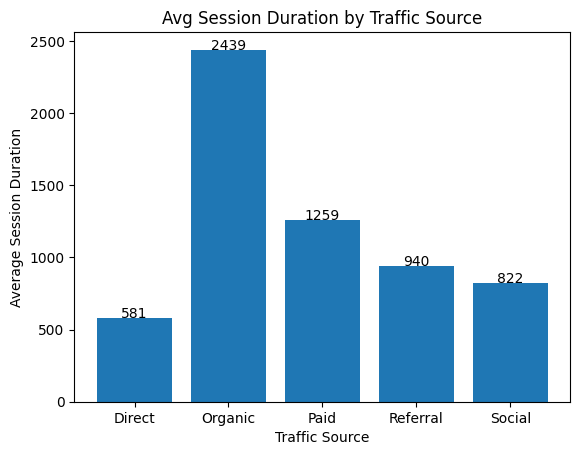

In [7]:
#bar chart shows Avg Session Duration by Traffic Source 

counts = df.groupby('Traffic Source')['Session Duration'].sum()

plt.bar(counts.index, counts.values)

plt.xlabel("Traffic Source")
plt.ylabel("Average Session Duration")
plt.title("Avg Session Duration by Traffic Source")
 
for i in range(len(counts)):
    plt.text(
        counts.index[i],      # x position
        counts.values[i],     # y position
       int(counts.values[i]),     # label value flote to integer
        ha='center',
    ) 

plt.show()

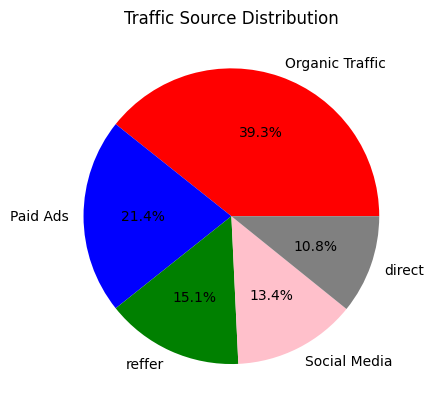

In [8]:
# using pie chart-- shows percentage which category comes more on website .

counts = df['Traffic Source'].value_counts()

label_map = {
    'Organic': 'Organic Traffic',
    'Social': 'Social Media',
    'Paid': 'Paid Ads',
    'Referral': 'reffer',
    'Direct': 'direct'
}

labels = [label_map[i] for i in counts.index]

plt.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    colors=["red", "blue", "green", "pink","grey"]
)

plt.title('Traffic Source Distribution')
plt.show()


In [9]:
df['Timespend']= ((df['Session Duration']+df['Time on Page']))
df.drop(columns=['Session Duration', 'Time on Page'], inplace=True)


In [10]:
df = df[df['Traffic Source'].isin(['Paid', 'Organic', 'Social'])]

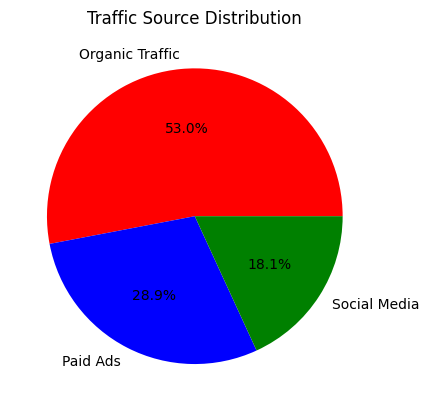

In [11]:
counts = df['Traffic Source'].value_counts()

label_map = {
    'Organic': 'Organic Traffic',
    'Social': 'Social Media',
    'Paid': 'Paid Ads'
  
}

labels = [label_map[i] for i in counts.index]

plt.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    colors=["red", "blue", "green"]
)

plt.title('Traffic Source Distribution')
plt.show()


In [12]:
df = pd.get_dummies(df, columns=['Traffic Source'], drop_first=True , dtype='uint8')


In [13]:
df.describe()

,Page Views,Bounce Rate,Previous Visits,Conversion Rate,Timespend,Traffic Source_Paid,Traffic Source_Social
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,4.942009,0.288541,1.971679,0.981409,7.096680,0.288604,0.181389
std,2.170688,0.162503,1.411064,0.067078,4.206115,0.453266,0.385470
min,0.000000,0.007868,0.000000,0.343665,0.106521,0.000000,0.000000
25%,3.000000,0.163248,1.000000,1.000000,4.026927,0.000000,0.000000
50%,5.000000,0.267843,2.000000,1.000000,6.256731,0.000000,0.000000
75%,6.000000,0.390561,3.000000,1.000000,9.396904,1.000000,0.000000
max,14.000000,0.844939,9.000000,1.000000,34.447424,1.000000,1.000000


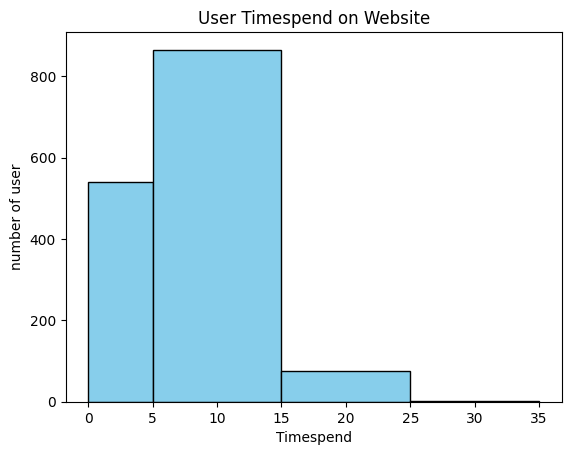

In [14]:
bins = [0, 5, 15,25,35]
#labels = ['veryLow (0-5)min', 'midlow (5-10)min', 'low(10-15)min', 'mid(15-20)min','high(20-25)','midhigh(25-30)','veryhigh(30-35)']
plt.hist(
   df['Timespend'],
   color ='skyblue',
   edgecolor = 'black',
    bins=bins,
    #labels=labels
)
plt.ylabel("number of user")
plt.xlabel("Timespend")
plt.title("User Timespend on Website")
plt.show()

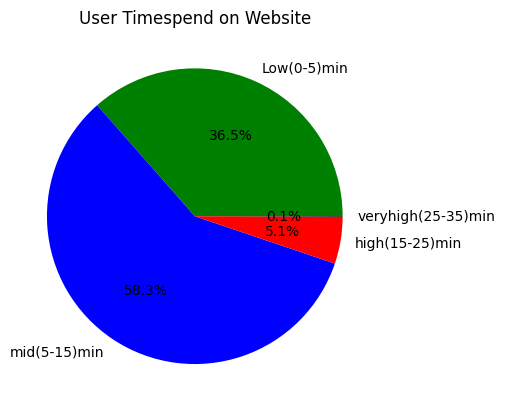

In [15]:


bins = [0,5,15,25,35]
labels = ['Low(0-5)min','mid(5-15)min','high(15-25)min', 'veryhigh(25-35)min']

df['Timespend_Category'] = pd.cut(
    df['Timespend'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

counts = df['Timespend_Category'].value_counts().sort_index()

plt.pie(
    counts.values,
    labels=counts.index,
    autopct='%1.1f%%',
    colors=[ "green","blue","red","black"]
)

plt.title('User Timespend on Website')
plt.show()


In [16]:
df['Return'] = 0

df.loc[
    (df['Timespend'] >= 4) &
    (df['Page Views'] >= 3) &
    (df['Previous Visits'] >= 2),
    'Return'
] = 1


In [17]:
df = df.drop(columns=['Bounce Rate', 'Conversion Rate'], axis = 1)
df.head()

,Page Views,Previous Visits,Timespend,Traffic Source_Paid,Traffic Source_Social,Timespend_Category,Return
0,5,3,14.941841,0,0,mid(5-15)min,1
1,4,0,11.907490,0,1,mid(5-15)min,0
2,4,2,11.257222,0,0,mid(5-15)min,1
3,5,3,5.701204,0,0,mid(5-15)min,1
4,5,5,6.196497,1,0,mid(5-15)min,1


In [34]:
df.shape

(1483, 6)

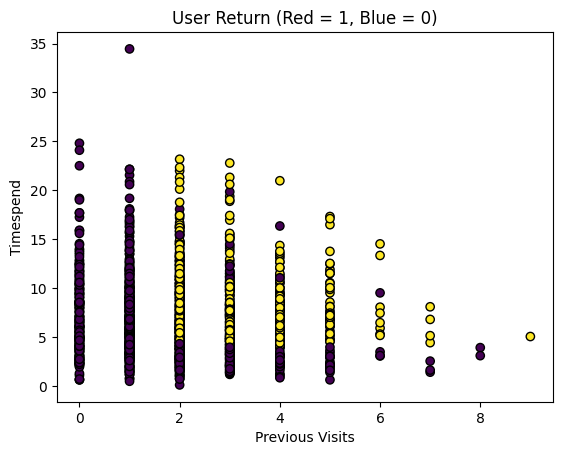

In [18]:
plt.scatter(
    df['Previous Visits'],
    df['Timespend'],
    c=df['Return'],      # 0 or 1
    #cmap='bwr',          # blue-white-red
    edgecolors='k'

)
plt.xlabel('Previous Visits')
plt.ylabel('Timespend')
plt.title('User Return (Red = 1, Blue = 0)')
#plt.colorbar()
plt.show()



In [19]:
percentages = df['Return'].value_counts(normalize=True) * 100
print(percentages)

Return
0    61.699258
1    38.300742
Name: proportion, dtype: float64


### this is better than previous plot because it is shows right color for right value with label.

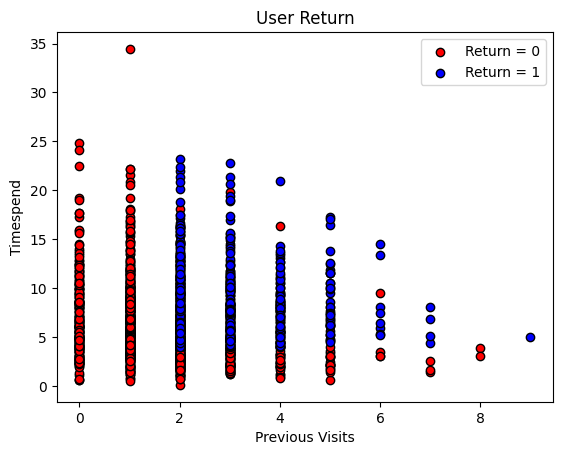

In [20]:
import matplotlib.pyplot as plt

# Split data by Return value
df0 = df[df['Return'] == 0]
df1 = df[df['Return'] == 1]

plt.scatter(
    df0['Previous Visits'],
    df0['Timespend'],
    color='red',
    label='Return = 0',
    edgecolors='k'
)

plt.scatter(
    df1['Previous Visits'],
    df1['Timespend'],
    color='blue',
    label='Return = 1',
    edgecolors='k'
)

plt.xlabel('Previous Visits')
plt.ylabel('Timespend')
plt.title('User Return')
plt.legend()
plt.show()



In [21]:
percentages = df['Return'].value_counts(normalize=True) * 100
print(percentages)

Return
0    61.699258
1    38.300742
Name: proportion, dtype: float64


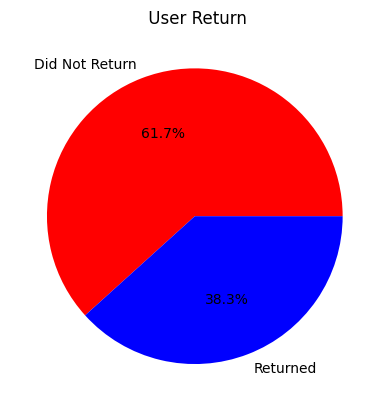

In [22]:
counts = df['Return'].value_counts()

label_map = {
    0: 'Did Not Return',
    1: 'Returned'
}

labels = [label_map[i] for i in counts.index]

plt.pie(
    counts.values,
    labels=labels,
    autopct='%1.1f%%',
    colors=("red","blue")
)
plt.title(' User Return')
plt.show()
